In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import signal

%matplotlib inline 

In [4]:
image_path = 'data/openCV/lena.png'

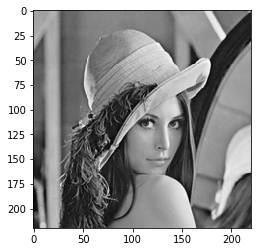

In [5]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [6]:
def show_image(image, title, color='gray'):
    fig = plt.figure()
    ax = fig.add_subplot(1,2,1)
    ax.imshow(image, cmap=color)
    ax.set_title(title)

In [7]:
class ImageProcess:
    def random_noise(self, image):
        mu, sigma = 0, 0.1
        noise = np.random.normal(mu, sigma, image.shape)
        noise = self.__normalize(noise)
        return noise + image
    
    def exponential_noise(self, image):
        noise = np.random.exponential(5, image.shape)
        noise = self.__normalize(noise)
        return noise + image
    
    def speckle_noise(self, image):
        noise = np.random.randn(*image.shape)
        noise = self.__normalize(noise)
        return image + noise * image
    
    def salt_and_pepper_noise(self, image):
        image = image.copy()
        image = self.__fill_image_pixels(image, 255)
        image = self.__fill_image_pixels(image, 50)
        return image
    
    def gamma_correlation(self, image, gamma):
        gamma_image = np.power(image, 1./gamma)
        return self.__normalize(gamma_image)

    def sobel_filter(self, image):
        horizontal = [[-1, -2, -1], [0, 0, 0], [1,2, 1]]
        vertical = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
        g_x = signal.convolve2d(horizontal, image)
        g_y = signal.convolve2d(vertical, image)
        return np.sqrt(g_x**2 + g_y**2)
    
    def grey_world(self, image):
        image = image.transpose(2, 0, 1).astype(np.uint32)
        mu_g = np.average(image[1])
        image[0] = np.minimum(image[0]*(mu_g/np.average(image[0])),255)
        image[2] = np.minimum(image[2]*(mu_g/np.average(image[2])),255)
        return  image.transpose(1, 2, 0).astype(np.uint8)
    
    def __fill_image_pixels(self, image, value):
        mask = np.random.randint(0,40,size=image.shape)
        image[mask == 1] = value
        return image
    
    def __normalize(self, noise):
        cv2.normalize(noise,  noise, 0, 255, cv2.NORM_MINMAX)
        return noise.astype(np.uint8)

In [8]:
img_process = ImageProcess()

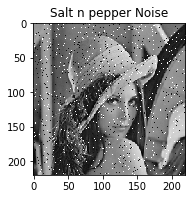

In [9]:
salt_and_pepper = img_process.salt_and_pepper_noise(img)
show_image(salt_and_pepper, "Salt n pepper Noise")

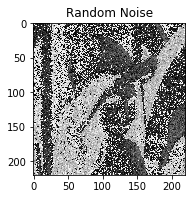

In [10]:
random_noise = img_process.random_noise(img)
show_image(random_noise, "Random Noise")

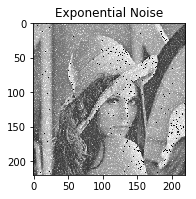

In [11]:
exponential_noise = img_process.exponential_noise(img)
show_image(exponential_noise, "Exponential Noise")

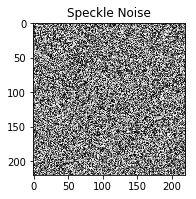

In [12]:
speckle_noise = img_process.speckle_noise(img)
show_image(speckle_noise, "Speckle Noise")

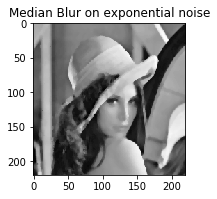

In [13]:
median_blur = cv2.medianBlur(salt_and_pepper,5)
show_image(median_blur, "Median Blur on exponential noise")

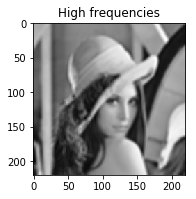

In [14]:
blur = cv2.GaussianBlur(img,(5,5),1000)
show_image(blur, "High frequencies")

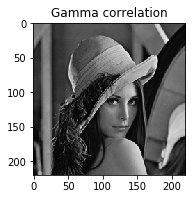

In [15]:
gamma_correlation = img_process.gamma_correlation(img, 0.5)
show_image(gamma_correlation, "Gamma correlation")

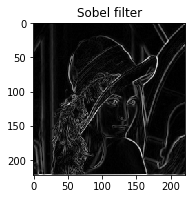

In [16]:
sobel_filter = img_process.sobel_filter(img)
show_image(sobel_filter, "Sobel filter")

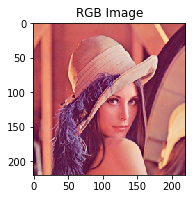

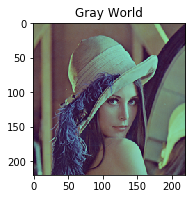

In [17]:
bgr_image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
show_image(rgb_image, "RGB Image", "viridis")
gray_world = img_process.grey_world(rgb_image)
show_image(gray_world, "Gray World", "viridis")

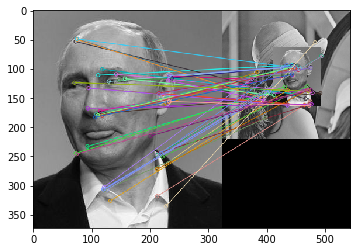

(<matplotlib.image.AxesImage at 0x16946356f60>, None)

In [32]:
img1 = cv2.imread('data/openCV/putin.jpg',0)          # queryImage
img2 = cv2.imread('data/openCV/lena_putin.png',0) # trainImage

orb = cv2.ORB_create()

# Finds keypoints in an image and computes their descriptors
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Need to draw only good matches, so create a mask
matches = sorted(matches, key = lambda x:x.distance) 
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:50],None, flags=2)

plt.imshow(img3),plt.show()